In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the dataset

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv('C:/Users/Aswin V S/Desktop/diabetes.csv')
df


print(df.head())





   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [15]:


# Check for missing values
print(df.isna().sum())
print(df[df['BloodPressure']==0].shape[0])#SHAPE[] GIVES THE NUMBER OF ENTRIES WITH BLOOD PRESSURE AS 0

print(df[df['Glucose']==0].shape[0])#SHAPE[] GIVES THE NUMBER OF ENTRIES WITH glucoselevel AS 0
print(df[df['SkinThickness']==0].shape[0])#SHAPE[] GIVES THE NUMBER OF ENTRIES WITH skin thickness AS 0
print(df[df['Insulin']==0].shape[0])#SHAPE[] GIVES THE NUMBER OF ENTRIES WITH  insulin AS 0
print(df[df['BMI']==0].shape[0])#SHAPE[] GIVES THE NUMBER OF ENTRIES WITH bmi AS 0
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
35
5
227
374
11


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47,1


In [16]:
# Feature and target separation
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()


# Standardize features

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)#k is no. of fetures u require
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5best features


         Specs        Score
4      Insulin  1989.589394
1      Glucose  1418.660636
7          Age   181.303689
0  Pregnancies   111.519691
5          BMI   108.933725


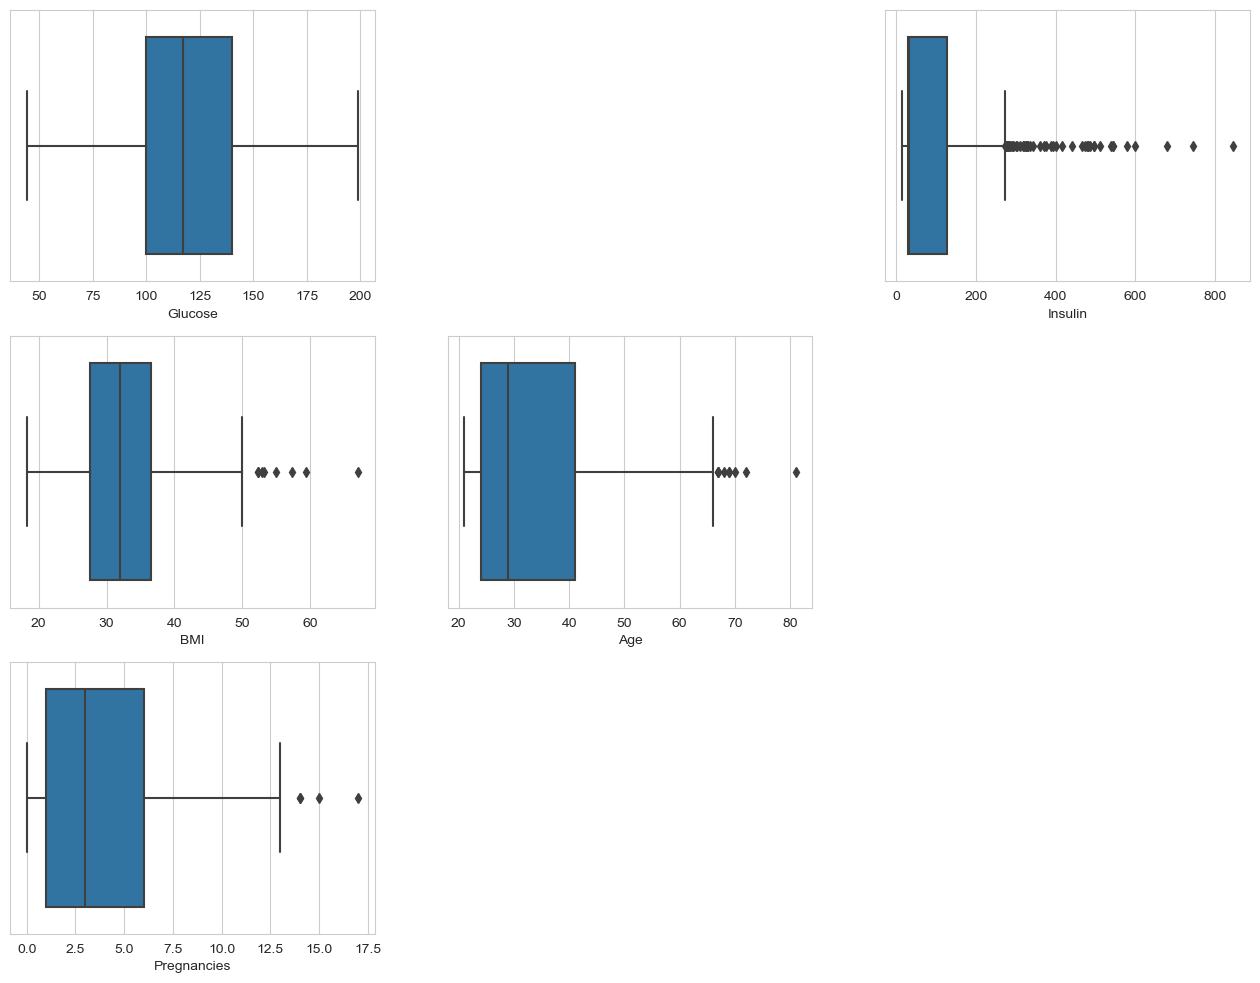

In [18]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)

plt.show()

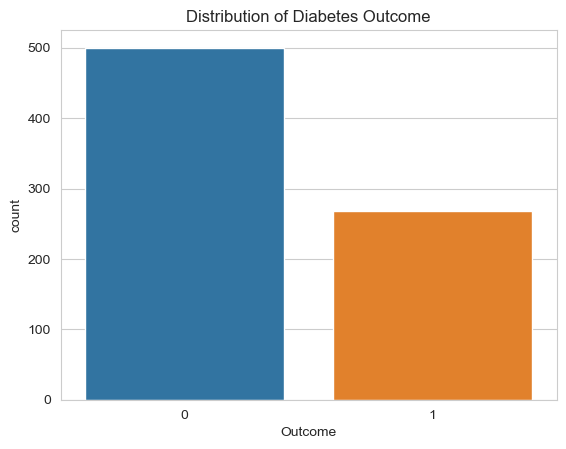

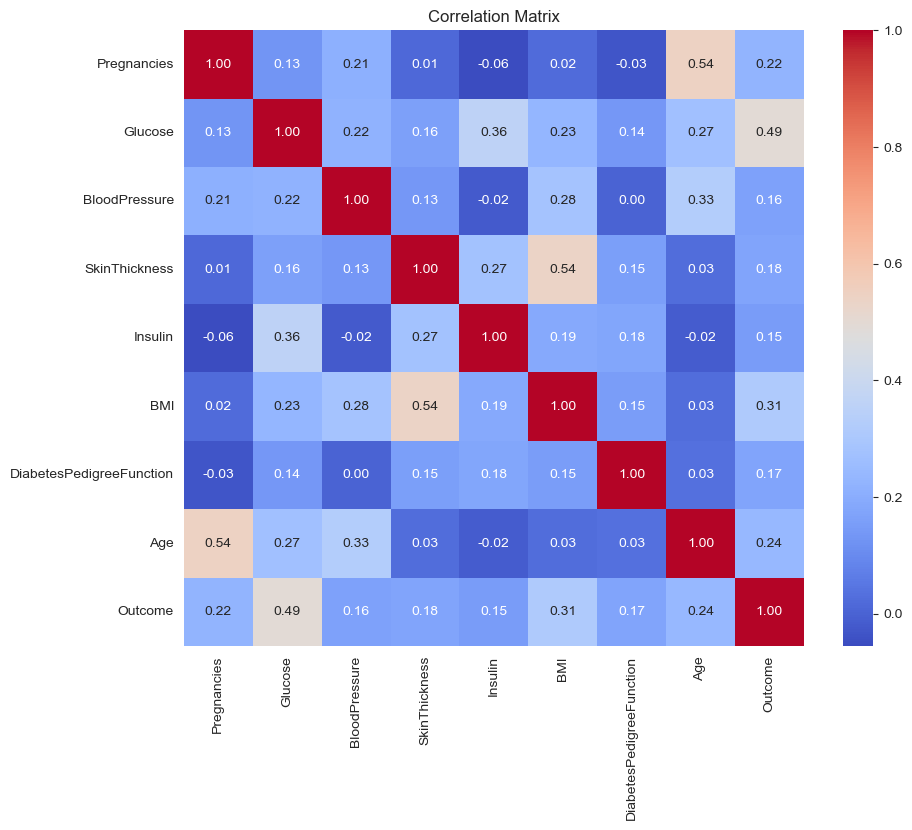

In [19]:
# Exploratory Data Analysis (EDA)


# Basic statistics
df.describe()

# Visualize distribution of target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()
df['Outcome'].value_counts()
#0-NON DIABETIC
#1-DIABETIC


# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



Accuracy: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

Confusion Matrix:
[[82 17]
 [19 36]]


<function matplotlib.pyplot.show(close=None, block=None)>

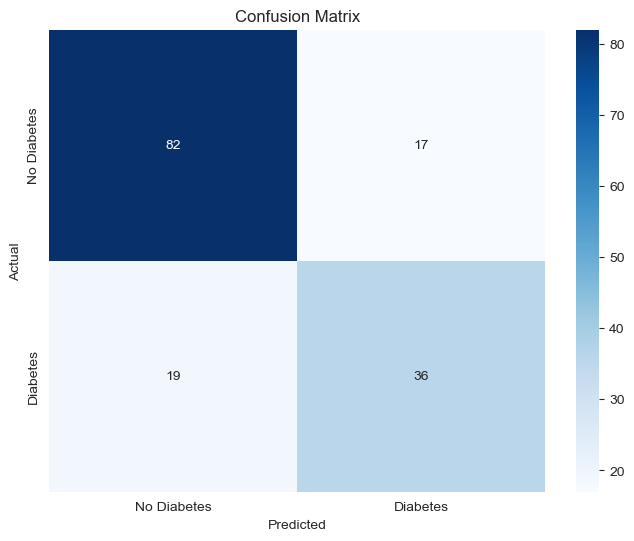

In [20]:
# Model Building




# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [ ]:
import numpy as np
l=[10,115,50,20,12,35.3,0.134,29]#example input
a=[]




def get_user_input():
    """
    Collect user input for each feature.
    """
    print("Please enter the following details:")
    p= float(input("Number of Pregnancies: "))
    g = float(input("Glucose Level: "))
    b = float(input("Blood Pressure: "))
    s = float(input("Skin Thickness: "))
    i = float(input("Insulin Level: "))
    bmi = float(input("BMI: "))
    d= float(input("Diabetes Pedigree Function: "))
    a = float(input("Age: "))
    
    return [p, g, b, s, i, bmi, d, a]
a.append(get_user_input())
a
# changing the input_data to numpy array
input_data_as_numpy_array =np.asarray(a)
input_data_as_numpy_array 
# reshape the array as we are predicting for one row of individuals data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#therefore intending from starting to end point with indices

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Please enter the following details:
